## Importing basic libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading and understanding the data:

In [2]:
df = pd.read_csv(r"C:\Users\rianl\OneDrive\Desktop\Akhil\Data Science and ML\Census Income\census-income.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Unnamed: 14'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace("-",".")

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'Unnamed: 14'],
      dtype='object')

In [6]:
df.columns = df.columns.str.replace("_",".")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'Unnamed: 14'],
      dtype='object')

In [7]:
df = df.replace('?', 'NaN')

In [9]:
df.head(18)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
df = df.replace('NaN', np.nan)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
Unnamed: 14          0
dtype: int64

In [12]:
df.dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
df = df.rename(columns = {'fnlwgt':'Final weight'})
df

,age,workclass,Final weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Visualization before modelling:

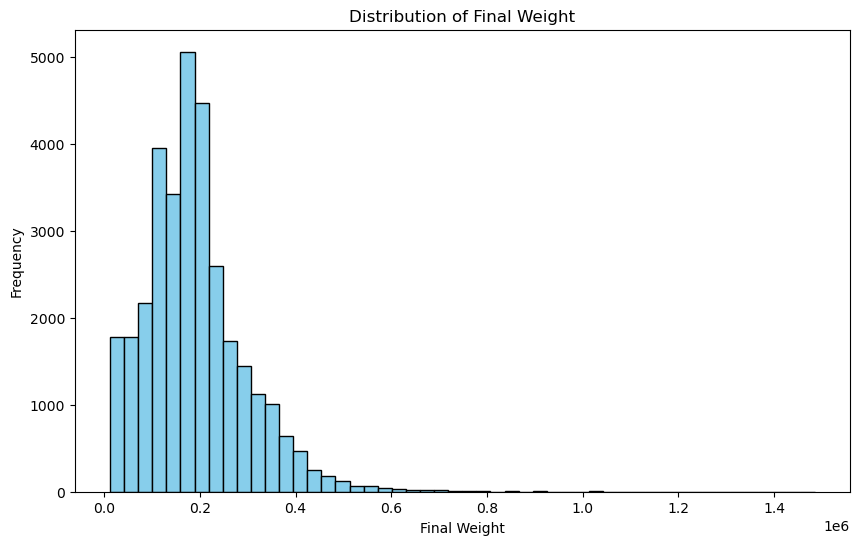

In [23]:
import matplotlib.pyplot as plt

#Plotting histogram of 'Final weight':
plt.figure(figsize=(10, 6))
plt.hist(df['Final weight'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Weight')
plt.xlabel('Final Weight')
plt.ylabel('Frequency')
plt.show()


C:\Users\rianl\AppData\Local\Temp\ipykernel_246360\1494694232.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


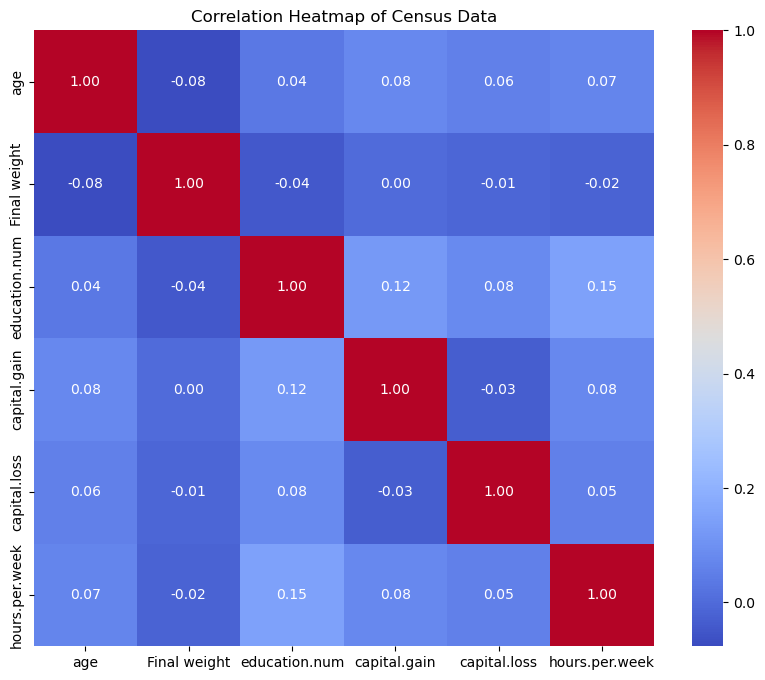

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate the correlation matrix:
corr = df.corr()

#Generate a heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Census Data')
plt.show()

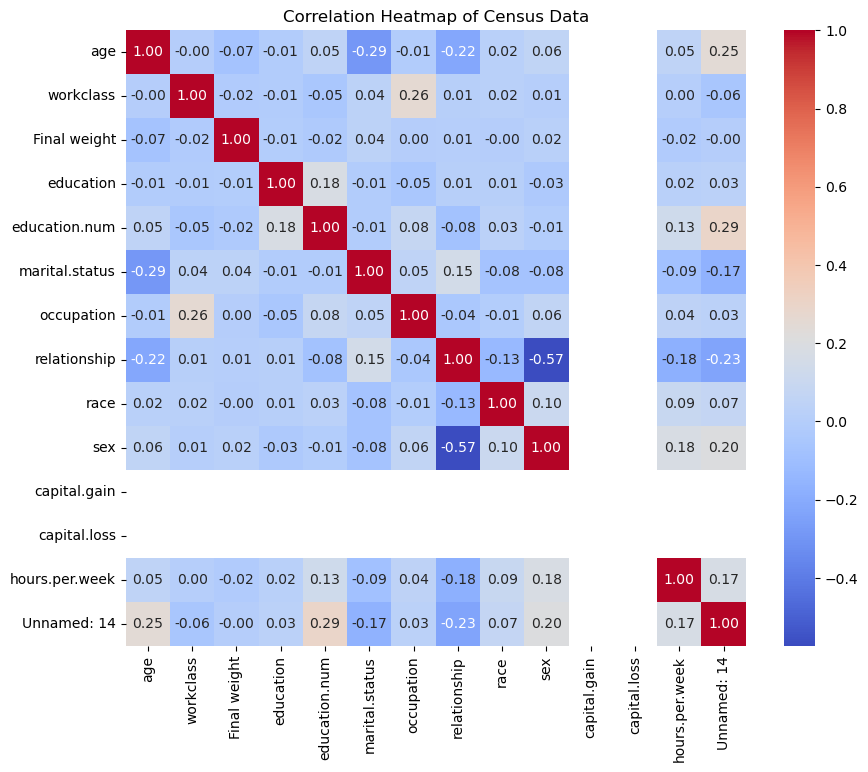

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculating the correlation matrix:
corr = df.corr()

#Generating a heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Census Data')
plt.show()



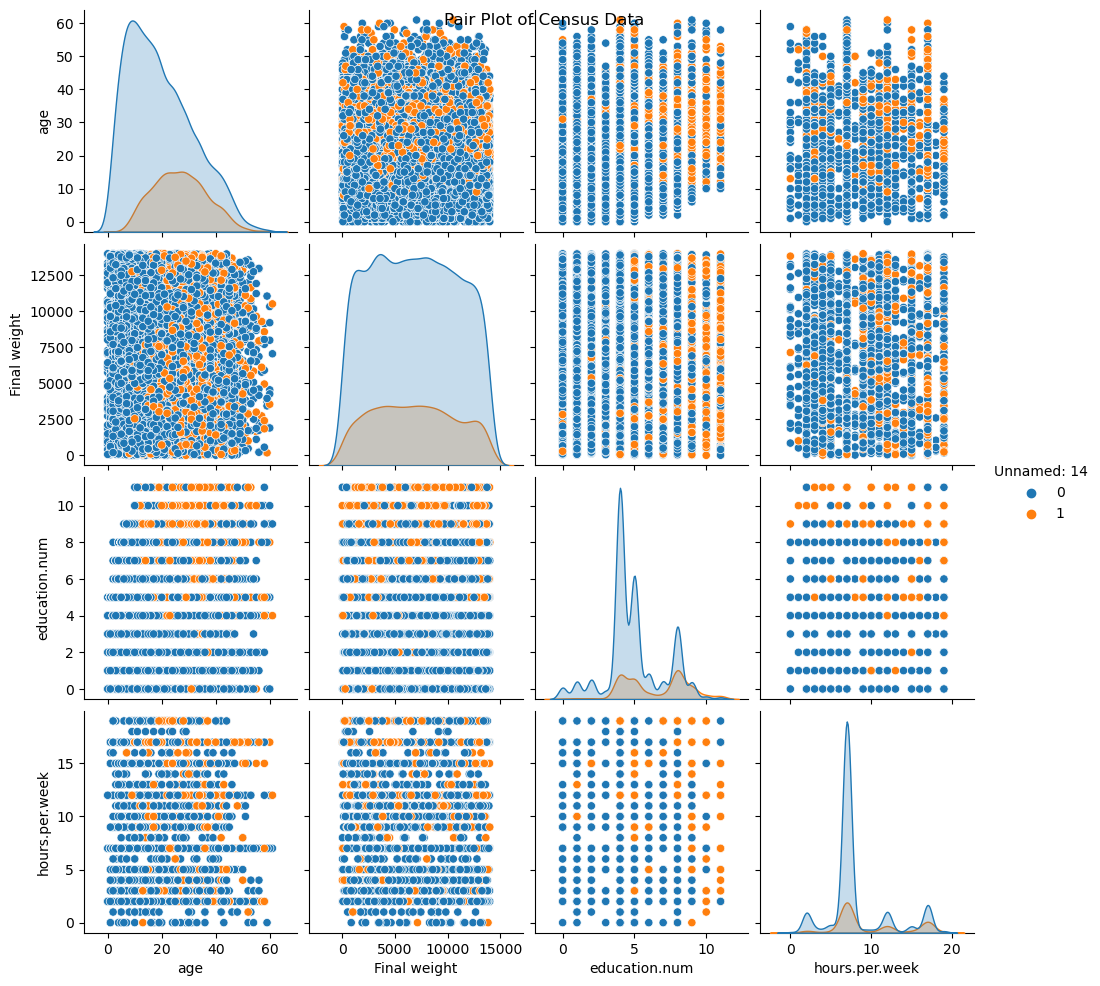

In [41]:
sns.pairplot(df, hue='Unnamed: 14', vars=['age', 'Final weight', 'education.num', 'hours.per.week'])
plt.suptitle('Pair Plot of Census Data', verticalalignment='top')
plt.show()



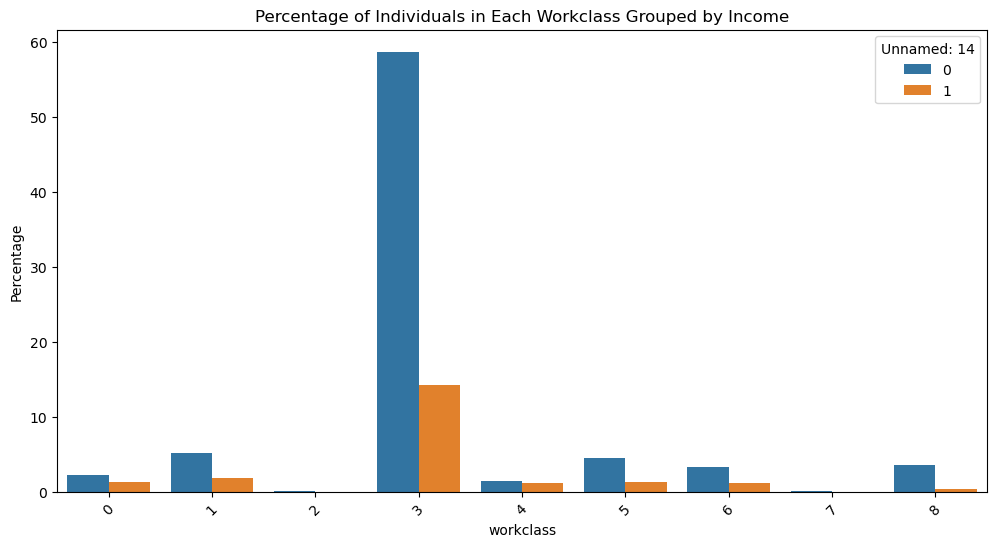

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='workclass', y='age', hue='Unnamed: 14', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Percentage')
plt.title('Percentage of Individuals in Each Workclass Grouped by Income')
plt.xticks(rotation=45)
plt.show()


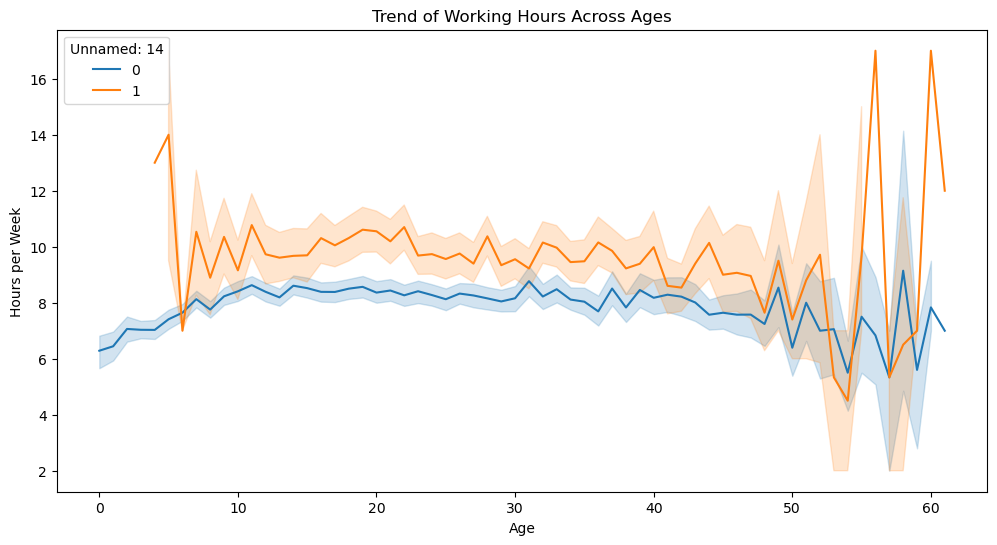

In [43]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='hours.per.week', hue='Unnamed: 14', data=df)
plt.title('Trend of Working Hours Across Ages')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()


## Logistic Regression:

## 1. Simple Logistic Regression:

In [44]:
col_list=list(df.columns)

In [45]:
col_list

['age',
 'workclass',
 'Final weight',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'Unnamed: 14']

Identifying Outliers with using boxplot:

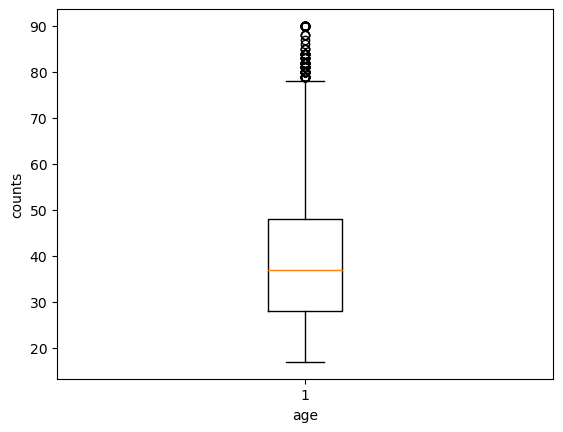

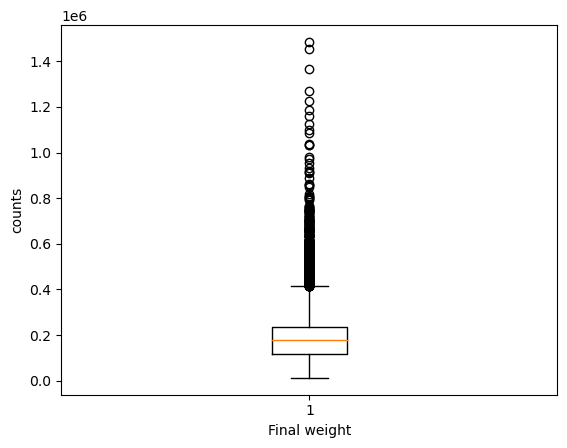

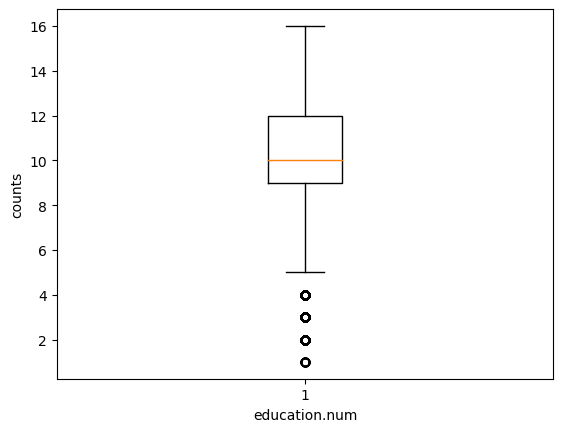

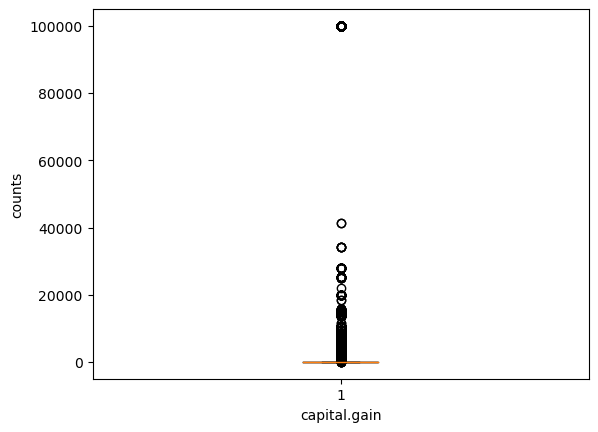

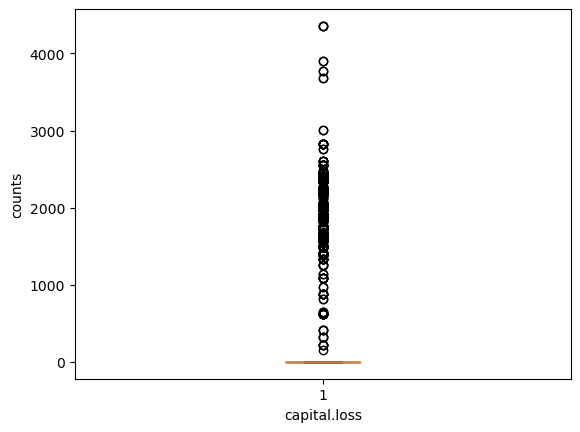

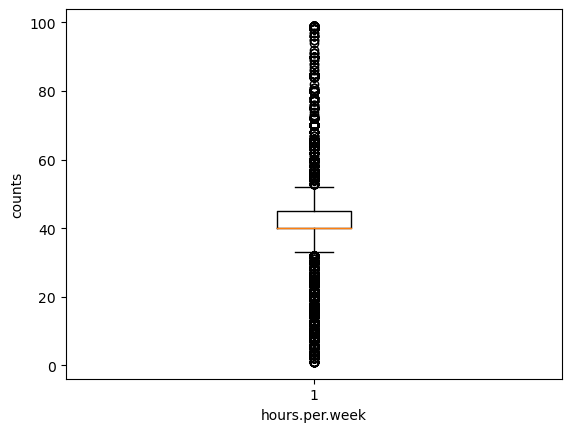

In [30]:
for i in col_list:
    if df[i].dtype==object:
        pass
    else:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('counts')
        plt.show()

In [31]:
#Removing the outliers by defining q1,q3 and and inter-quartile range (IQR):
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)

age                   20.0
Final weight      119224.0
education.num          3.0
capital.gain           0.0
capital.loss           0.0
hours.per.week         5.0
dtype: float64


C:\Users\rianl\AppData\Local\Temp\ipykernel_246360\2484786612.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=df.quantile(0.25)
C:\Users\rianl\AppData\Local\Temp\ipykernel_246360\2484786612.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=df.quantile(0.75)


In [32]:
df=df[~((df<(q1-1.5*IQR)) | (df>q3+1.5*IQR)).any(axis=1)]

C:\Users\rianl\AppData\Local\Temp\ipykernel_246360\2283517156.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(q1-1.5*IQR)) | (df>q3+1.5*IQR)).any(axis=1)]


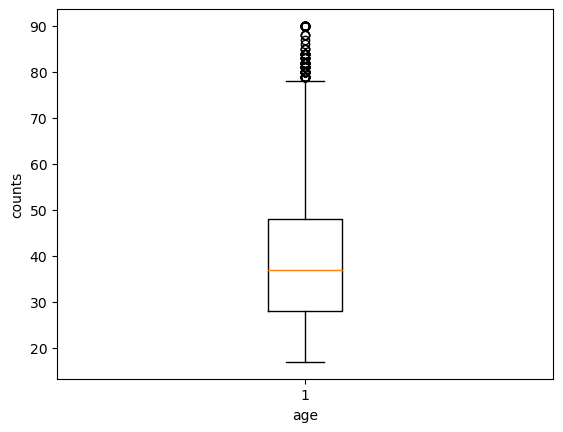

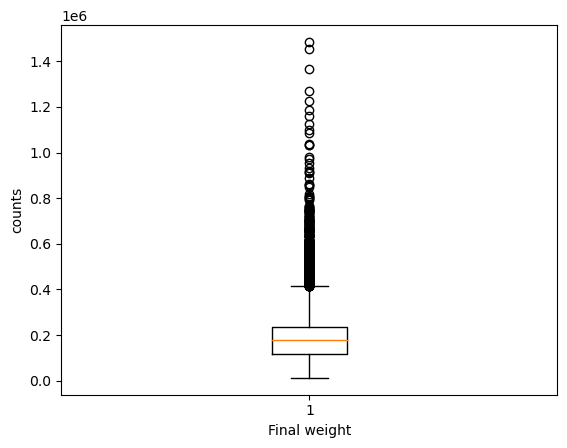

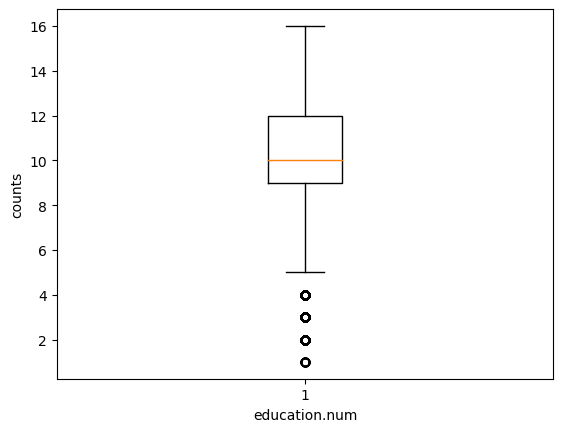

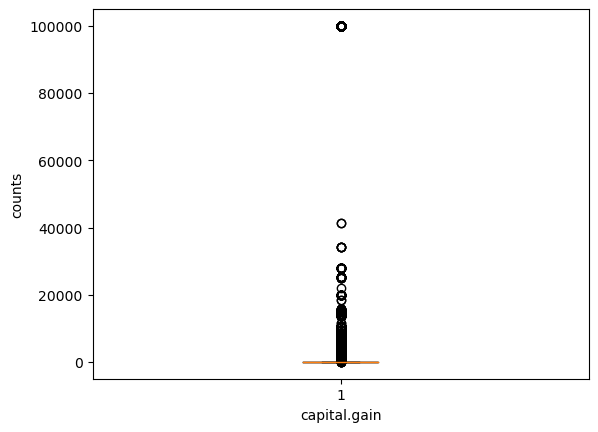

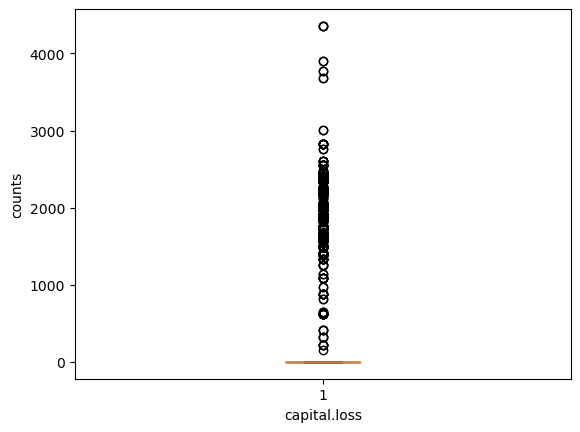

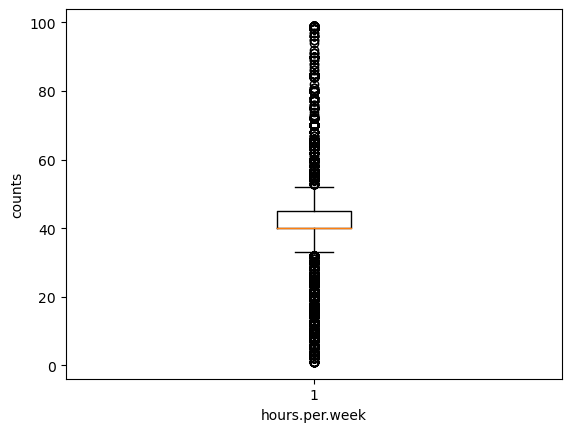

In [17]:
for i in col_list:
    if df[i].dtype==object:
        pass
    else:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('counts')
        plt.show()

In [33]:
labelencoder=LabelEncoder()

In [34]:
for i in col_list:
    df[i]=labelencoder.fit_transform(df[i])

C:\Users\rianl\AppData\Local\Temp\ipykernel_246360\112004906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=labelencoder.fit_transform(df[i])
C:\Users\rianl\AppData\Local\Temp\ipykernel_246360\112004906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=labelencoder.fit_transform(df[i])
C:\Users\rianl\AppData\Local\Temp\ipykernel_246360\112004906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [35]:
df

,age,workclass,Final weight,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
2,21,3,9527,8,4,0,5,1,4,1,0,0,7,37,0
3,36,3,10398,1,2,2,5,0,2,1,0,0,7,37,0
4,11,3,13019,6,8,2,9,5,2,0,0,0,7,4,0
5,20,3,11927,9,9,2,3,5,4,0,0,0,7,37,0
7,35,5,9208,8,4,2,3,0,4,1,0,0,12,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,36,3,12724,9,9,2,3,0,4,1,0,0,7,37,1
32555,5,3,12491,11,5,4,10,1,4,1,0,0,7,37,0
32556,10,3,11176,4,7,2,12,5,4,0,0,0,5,37,0
32557,23,3,5335,8,4,2,6,0,4,1,0,0,7,37,1


In [99]:
#VIF Calculation, filtering to include only numeric columns and exclude 'annual.income':
col_list = [col for col in df.columns if df[col].dtypes != 'object' and col != 'annual.income']
x = df[col_list]
vif_df = pd.DataFrame()
vif_df['feature'] = x.columns
vif_df['VIF'] = [variance_inflation_factor(x.values, idx) for idx in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   4.075245
1        workclass   5.850863
2     Final weight   3.775263
3    education.num   6.949524
4   marital.status   3.826204
5       occupation   3.196436
6     relationship   2.440699
7             race  12.816024
8              sex   4.212325
9     capital.gain        NaN
10    capital.loss        NaN
11  hours.per.week   5.718162
12     Unnamed: 14   1.563627


C:\Users\rianl\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
#Dropping 'native.country' due to high multicollinearity, indicating this feature can be predicted by multiple features with high accuracy. This might make the models inaccurate and unstable if trained on this feature:
df=df.drop('native.country', axis=1)

In [130]:
#Since 'capital.gain' and 'capital.loss' have no varying values, they can't contribute to any model involving classification:
df=df.drop(['capital.gain','capital.loss'], axis=1)

In [101]:
col_list = [col for col in df.columns if df[col].dtypes != 'object' and col != 'annual.income']
x = df[col_list]
vif_df = pd.DataFrame({
    'feature': x.columns,
    'VIF': [variance_inflation_factor(x.values, idx) for idx in range(x.columns.size)]
})
print(vif_df)

           feature        VIF
0              age   4.075245
1        workclass   5.850863
2     Final weight   3.775263
3    education.num   6.949524
4   marital.status   3.826204
5       occupation   3.196436
6     relationship   2.440699
7             race  12.816024
8              sex   4.212325
9     capital.gain        NaN
10    capital.loss        NaN
11  hours.per.week   5.718162
12     Unnamed: 14   1.563627


C:\Users\rianl\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [27]:
#Dropping 'race' due to high multicollinearity, indicating this feature can be predicted by multiple features with high accuracy. This might make the models inaccurate and unstable if trained on this feature:
df=df.drop('race', axis=1)

In [24]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   3.724398
1        workclass   8.450224
2     Final weight   3.830888
3        education   9.187800
4    education.num  16.497184
5   marital.status   4.093760
6       occupation   3.709026
7     relationship   2.665862
8             race  17.252506
9              sex   4.460860
10    capital.gain   1.244007
11    capital.loss   1.089626
12  hours.per.week  11.878895
13  native.country  19.241328
14     Unnamed: 14   1.862462


In [47]:
#Dropping 'education' for the same reason:
df=df.drop('education', axis=1)

In [25]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='annual.income')):
        col_list.append(i)

x=df[col_list]
vif_df=pd.DataFrame()
vif_df['feature']=x.columns
vif_df['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_df)

           feature        VIF
0              age   3.724398
1        workclass   8.450224
2     Final weight   3.830888
3        education   9.187800
4    education.num  16.497184
5   marital.status   4.093760
6       occupation   3.709026
7     relationship   2.665862
8             race  17.252506
9              sex   4.460860
10    capital.gain   1.244007
11    capital.loss   1.089626
12  hours.per.week  11.878895
13  native.country  19.241328
14     Unnamed: 14   1.862462


In [27]:
df

,age,workclass,Final weight,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Unnamed: 14
0,22,7,2671,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,8,4,1,3,4,1,0,0,19,39,0


In [51]:
#Creating a dataframe 'x', which is the occupation of individuals as the independent variable for logistic regression:
x=pd.DataFrame(df.iloc[:,5])
x

,occupation
2,5
3,5
4,9
5,3
7,3
...,...
32554,3
32555,10
32556,12
32557,6


In [52]:
#Creating 'y' as dependent variable, corresponding to the income of the individuals, which is what we aim to predict:
y=df.iloc[:,-1]
y

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: Unnamed: 14, Length: 18997, dtype: int32

In [53]:
#Dividing the dataset into training and test sets:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.70, random_state=0)

In [54]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13297, 1)
(13297,)
(5700, 1)
(5700,)


In [55]:
simple_model=LogisticRegression()

In [56]:
simple_model.fit(x_train,y_train)

LogisticRegression()

In [57]:
#Now we predict on the test set:
predictions1 = simple_model.predict(x_test)

In [58]:
predictions1

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
#Creating the confusion matrix to find the accuracy:
print('Accuracy of the Simple Logistic Regression Model: ')
print(accuracy_score(y_test, predictions1))

Accuracy of Simple Logistic Regression Model: 
0.7821052631578947


In [60]:
print('Confusion Matrix of the Simple Logistic Regression Model: ')
print(confusion_matrix(y_test, predictions1))

Confusion Matrix of Simple Logistic Regression Model: 
[[4458    0]
 [1242    0]]


## 2. Multiple Logistic Regression model

In [63]:
#Creating the dataframe 'x2', which consists of the independent variables 'age', 'workclass', and 'education':
x2=pd.DataFrame(df.iloc[:,[0,1,3]])
x2


,age,workclass,education.num
2,21,3,4
3,36,3,2
4,11,3,8
5,20,3,9
7,35,5,4
...,...,...,...
32554,36,3,9
32555,5,3,5
32556,10,3,7
32557,23,3,4


In [61]:
#Creating the dataframe 'y2', which consists of the dependent variable 'annual income':
y2=df.iloc[:,-1]
y2

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: Unnamed: 14, Length: 18997, dtype: int32

In [64]:
#Dividing the dataset into training and test sets:
x_train, x_test, y_train, y_test=train_test_split(x2,y2, train_size=0.80, random_state=0)

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15197, 3)
(15197,)
(3800, 3)
(3800,)


In [66]:
multiple_model=LogisticRegression()

In [67]:
multiple_model.fit(x_train,y_train)

LogisticRegression()

In [68]:
predictions2 = multiple_model.predict(x_test)

In [69]:
predictions2

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
#Creating the confusion matrix and obtaining the accuracy:
print('Accuracy of Multiple Logistic Regression Model: ')
print(accuracy_score(y_test, predictions2))

Accuracy of Multiple Logistic Regression Model: 
0.7894736842105263


In [71]:
print('Confusion Matrix of Multiple Logistic Regression Model: ')
print(confusion_matrix(y_test, predictions2))

Confusion Matrix of Multiple Logistic Regression Model: 
[[2844  125]
 [ 675  156]]


## 3. Decision Tree:

In [73]:
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [74]:
#Creating a dataframe of the feature variables as 'x3' for the decision tree model:
x3=(df.iloc[:,:-1])
x3

,age,workclass,Final weight,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
2,21,3,9527,4,0,5,1,4,1,0,0,7
3,36,3,10398,2,2,5,0,2,1,0,0,7
4,11,3,13019,8,2,9,5,2,0,0,0,7
5,20,3,11927,9,2,3,5,4,0,0,0,7
7,35,5,9208,4,2,3,0,4,1,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,36,3,12724,9,2,3,0,4,1,0,0,7
32555,5,3,12491,5,4,10,1,4,1,0,0,7
32556,10,3,11176,7,2,12,5,4,0,0,0,5
32557,23,3,5335,4,2,6,0,4,1,0,0,7


In [75]:
y3=df.iloc[:,-1]
y3

2        0
3        0
4        0
5        0
7        1
        ..
32554    1
32555    0
32556    0
32557    1
32558    0
Name: Unnamed: 14, Length: 18997, dtype: int32

In [77]:
#Dividing the dataset into training and test sets:
x_train, x_test, y_train, y_test=train_test_split(x3,y3, train_size=0.70, random_state=0)

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13297, 12)
(13297,)
(5700, 12)
(5700,)


In [102]:
#Decision Tree Model Training and Initial Evaluation:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

#Initializing and fitting the decision tree classifier:
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

#Predicting on training and testing data:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [103]:
#Plotting the confusion matrix:
def plot_confusionmatrix(y_pred, y_true, domain):
    print(f'{domain} Confusion Matrix')
    cf = confusion_matrix(y_pred, y_true)
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9999341975389879
Test score 0.7713157894736842
Train Confusion Matrix


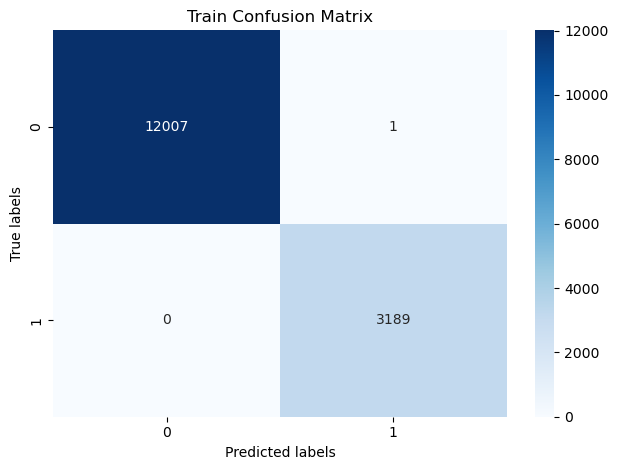

Test Confusion Matrix


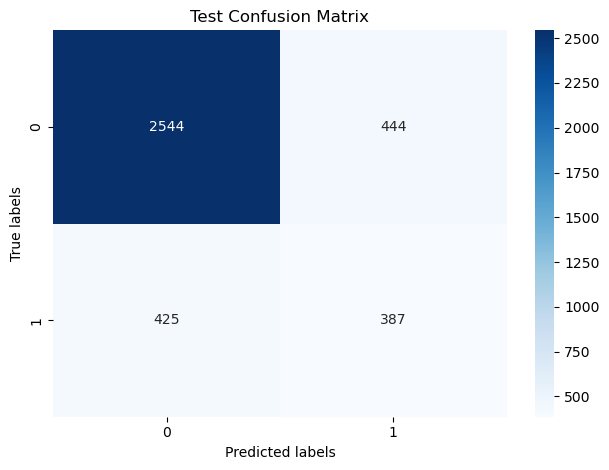

In [105]:
#Function to plot confusion matrix with domain specification
def plot_confusionmatrix(y_pred, y_true, dom):
    print(f'{dom} Confusion Matrix')
    cf = confusion_matrix(y_pred, y_true) 
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{dom} Confusion Matrix')  # Adding a title to the plot for clarity
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.tight_layout()
    plt.show()

print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')
plot_confusionmatrix(y_train_pred, y_train, dom='Train')
plot_confusionmatrix(y_test_pred, y_test, dom='Test')


In [106]:
#Tuning the Decision Tree using GridSearchCV:
params = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [107]:
#Retraining with the best parameters found:
model = gcv.best_estimator_
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

Train score 0.8375995262222807
Test score 0.8213157894736842
Train Confusion Matrix


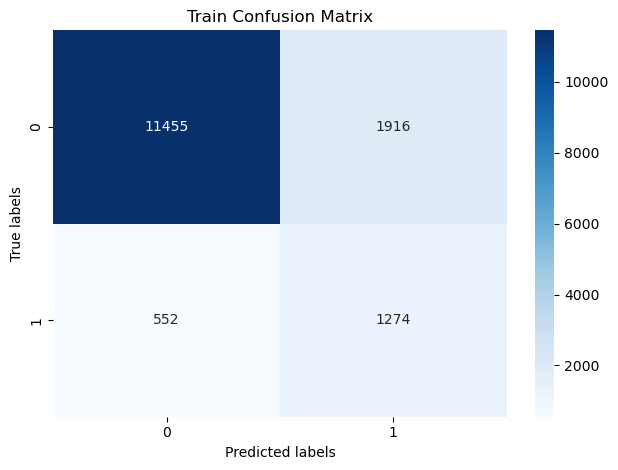

Test Confusion Matrix


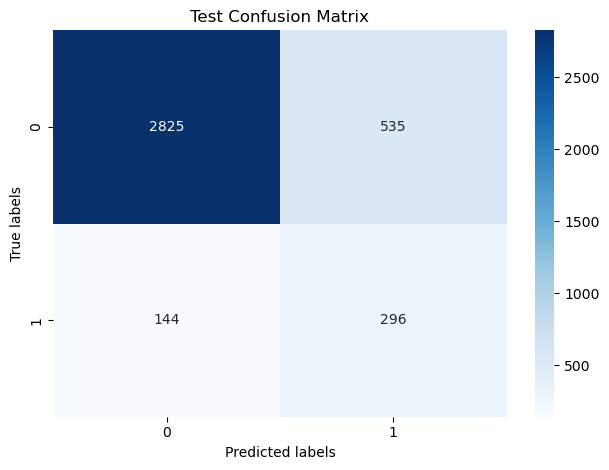

In [108]:
#Accuracy and confusion matrices:
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')
plot_confusionmatrix(y_train_pred, y_train, dom='Train')
plot_confusionmatrix(y_test_pred, y_test, dom='Test')

In [109]:
#Pruning the Decision Tree:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [110]:
#Excluding the last element to avoid the minimal tree with one node:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

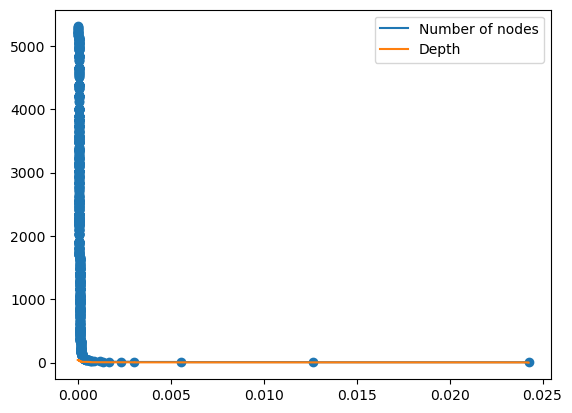

In [111]:
#Plotting depth of the tree versus alpha:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas, node_counts)
plt.plot(ccp_alphas, node_counts, label='Number of nodes', drawstyle='steps-post')
plt.plot(ccp_alphas, depth, label='Depth', drawstyle='steps-post')
plt.legend()

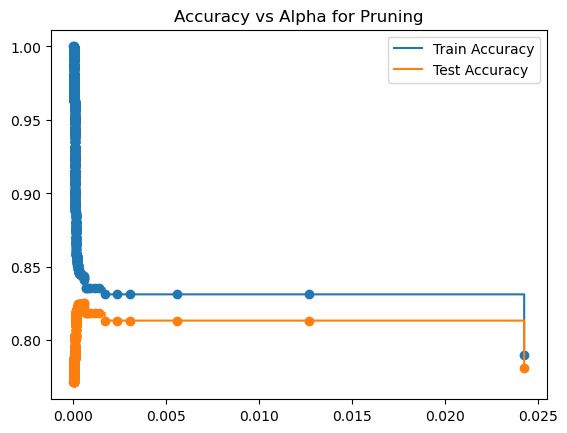

In [112]:
# Evaluate accuracy versus alpha for training and testing
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred, y_train))
    test_acc.append(accuracy_score(y_test_pred, y_test))

plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label="Test Accuracy", drawstyle="steps-post")
plt.legend()
plt.title("Accuracy vs Alpha for Pruning")
plt.show()


In [113]:
#Final model with selected alpha value for complexity pruning:
clf_ = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.020)
clf_.fit(x_train, y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

Train score 0.8312824899651247
Test score 0.8134210526315789
Train Confusion Matrix


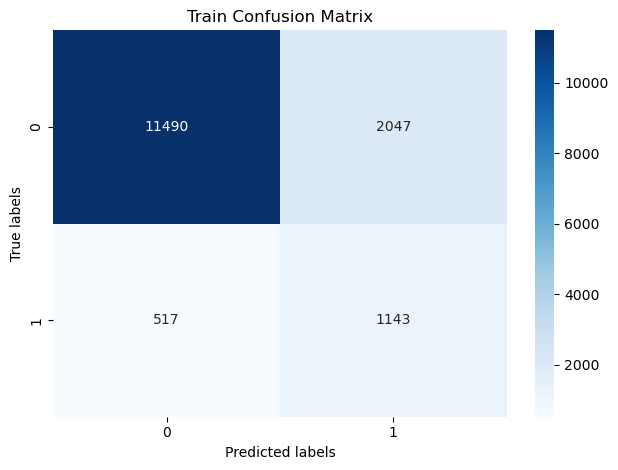

Test Confusion Matrix


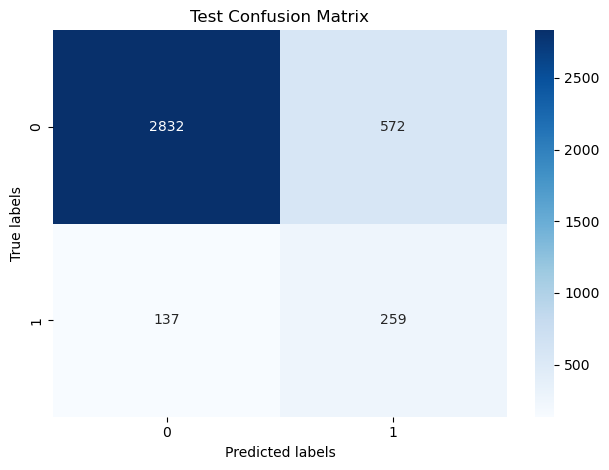

In [114]:
#Final model accuracy and confusion matrices
print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')
plot_confusionmatrix(y_train_pred, y_train, dom='Train')
plot_confusionmatrix(y_test_pred, y_test, dom='Test')

## 4. Random Forest Model:

In [116]:
#Splitting the dataset into training and test sets with an 80:20 ratio.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, y3, train_size=0.80, random_state=0)
print(f'Training set size: {x_train.shape}, Testing set size: {x_test.shape}')

Training set size: (15197, 12), Testing set size: (3800, 12)


In [117]:
#RandomForest Training and Prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
#Creating and training the RandomForest model with 300 trees
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [119]:
#Predicting the outcomes for both training and testing datasets
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
print(y_test_pred)

[1 0 0 ... 0 0 0]


Train score: 0.9999341975389879
Test score: 0.8173684210526316
Train Confusion Matrix


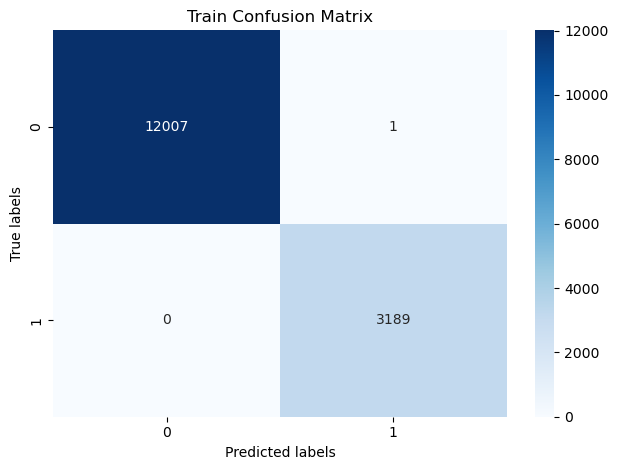

Test Confusion Matrix


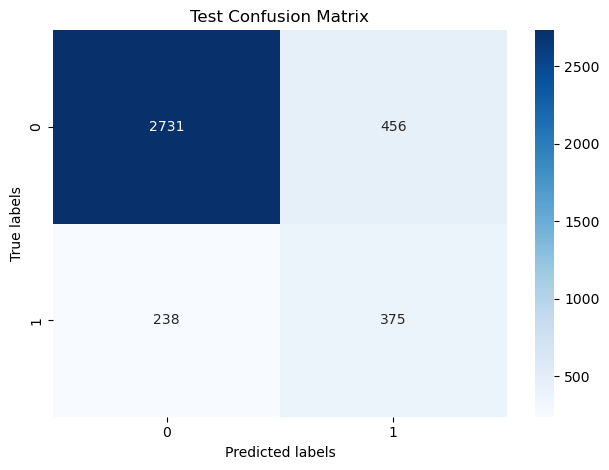

In [122]:
#Displaying the accuracy score and plotting confusion matrices:
def plot_confusionmatrix(y_pred, y_true, domain):
    print(f'{domain} Confusion Matrix')
    cf = confusion_matrix(y_pred, y_true)
    sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
    plt.title(f'{domain} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.tight_layout()
    plt.show()

# Now use 'domain' instead of 'dom' as the keyword argument:
print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')
plot_confusionmatrix(y_train_pred, y_train, domain='Train')
plot_confusionmatrix(y_test_pred, y_test, domain='Test')


In [123]:
#Hyperparameter Tuning with GridSearchCV to optimize the model parameters:
from sklearn.model_selection import GridSearchCV

#Defining parameter grid for RandomForestClassifier:
params = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [124]:
#Running GridSearchCV to find the best model parameters:
clf = RandomForestClassifier(n_estimators=300)
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=300),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [125]:
#Now we re-train the model with the best parameters found:
model = gcv.best_estimator_
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [128]:
#Accuracy scores for the optimized model:
print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')

Train score: 0.8704349542672896
Test score: 0.83


## Model Comparison:

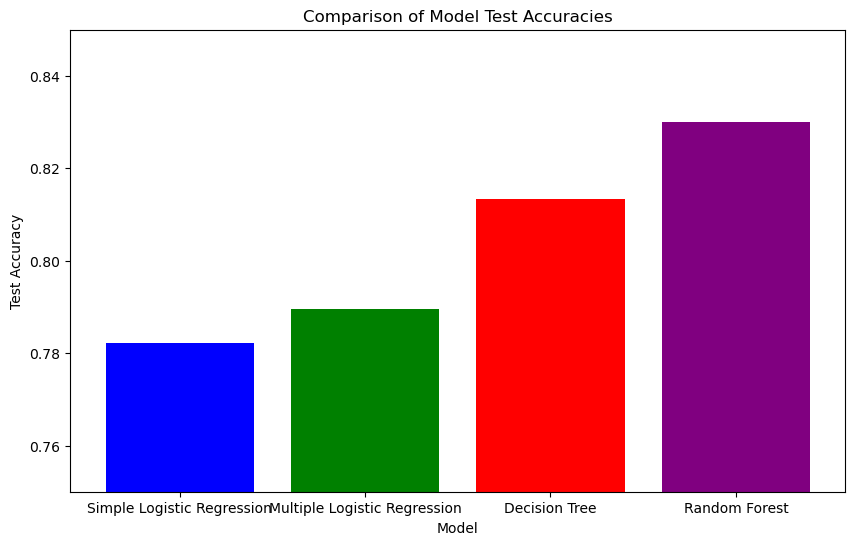

In [129]:
test_accuracies = [0.7821, 0.7895, 0.8134, 0.83]
models = ['Simple Logistic Regression', 'Multiple Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.ylim([0.75, 0.85])  # Set y-axis limits to better visualize differences
plt.show()

## Conclusion: 

1. Logistic regression assumes a linear relationship between the dependent variable and each of the independent variables. Since true relationships in this data involve complex interactions between variables that logistic regression cannot capture, its performance was suboptimal.


2. Multiple logistic regression offers a more nuanced approach than simple logistic regression by considering multiple factors simultaneously. However, its effectiveness is still limited due to the nature of logistic regression and the complexities of the data.


3. The Decision Tree model naturally handle feature interactions and hierarchies, making them more adept at dealing with the multifaceted nature of socio-economic data. However it tends to learn highly detailed data specifics, and capture noise in the data as well. Decision trees are notoriously prone to overfitting, especially with complex data such as this Census Income Dataset which has high degrees of multicollinearity.


4. The Random Forest model provided the highest test accuracy among the models, making it the best performer for predicting census income based on the given dataset. This shows us that the Random Forest's ensemble approach in using multiple decision trees to make a more accurate prediction is highly effective. Having many trees in the model reduces the risk of an incorrect prediction, as the majority voting system of the Random Forest leads to more reliable and stable predictions.



It was able to handle the complexities and potential non-linear relationships in the data better than the single decision trees and logistic regression models, and it therefore the winner.